This is my first notebook to practice working with Machine Learning in the Data Science field. Before jumping into this project, I'd like to comment on this dataset. The prediction will probably be incorrect because there are only 15 rows of value. Also, this dataset is limited to American women aged 30-39, which is a pretty narrow group to give predictions.

In [1]:
# I want to see all of the outcome, so I import InteractiveShell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Loading the dataset
heiwei = pd.read_csv('/kaggle/input/heights-and-weights/data.csv')

**I. OVERVIEW**

First, let's take a look at the dataset we want to work with. I want to see if there are anything we should pay attention to before jumping into our work.

In [4]:
# Check if there are any strange values in the dataset by looking at the first and last 5 rows of the data set
heiwei.head()
print( )
heiwei.tail()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


,Height,Weight
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


In [5]:
# Take a look at some basic characteristics in the dataset 
heiwei.info()
print( )
heiwei.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes



,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


**II. GRAPHING AND APPLYING LINEAR REGRESSION MODEL**

After checking, besides having too small sample, the dataset is very clean with no NaN or missig values. Now, we can start working on our model.

In [6]:
# Define the feature (Height) and the target (Weight) as two Numpy arrays
y = heiwei['Weight'].values.reshape(-1, 1)
X = heiwei.drop('Weight', axis = 1)

# Check the dimensions of X and y
y.shape
X.shape

(15, 1)

(15, 1)

<Axes: xlabel='Height', ylabel='Weight'>

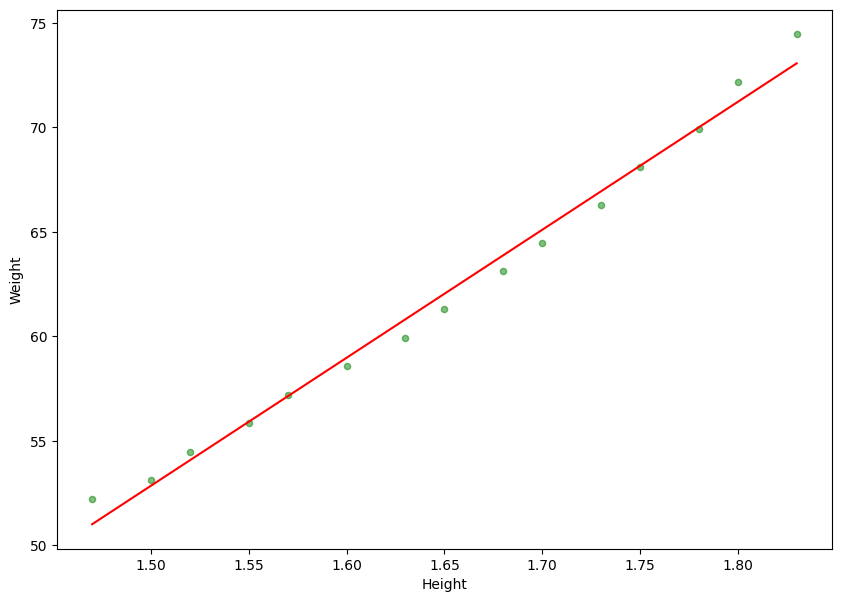

In [7]:
# Plot the scatterplot
heiwei.plot(kind = 'scatter', x = 'Height', y = 'Weight', c ='g',
            figsize = (10,7),
            alpha = 0.5)

# Add a linear regression line
beta1, beta0 = np.polyfit(heiwei['Height'], heiwei['Weight'], 1)
plt.plot(heiwei['Height'], beta1 * heiwei['Height'] + beta0, 'r')

**III. CREATE AND TRAIN THE LINEAR REGRESSION MODEL USING SCI-KIT LEARN**

This is the main part of this notebook where we start working on our model and give predictions

In [8]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, # feature
    y, # target
    test_size = 0.1, # 10% data to be included in the test set
    random_state = 42 # specify random seed for results replication
)

In [9]:
# Train and evaluate the train set using a linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make a prediction for weight when height = 1.65 using the trained linear regression.
height_input = 1.65  # Replace with the desired height value
height_input_reshaped = np.array([[height_input]]) # Reshape to a 2D array
predicted_weight = lin_reg.predict(height_input_reshaped)

print(f"Predicted weight for height {height_input}: {predicted_weight[0][0]}") # Access the predicted value

Predicted weight for height 1.65: 62.093525763793856


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**IV. CALCULATE THE ROOT MEAN SQUARE ERROR (RMSE) USING THE TEST SET**

After training the model, we should check how accuracy our model could be. By comparing the RMSE, you will also find out if this model is the most suitable for your purpose. Otherwise, you should change to another model (For example, K-nearest neighbors).

In [11]:
# Calculate RMSE of linear regression model using the test set
y_pred_lin = lin_reg.predict(X_test) # predict charges
lin_mse = mean_squared_error(y_pred_lin, y_test) # calculate mean squared error
lin_rmse = np.sqrt(lin_mse) # calculate rmse
print(f"The RSME of the linear regression is: {lin_rmse}")

The RSME of the linear regression is: 0.5062940333533222


In [12]:
# Replace the linear regression with k-nearest neighbors regression
model_kn = KNeighborsRegressor(n_neighbors = 5)

In [13]:
# Train and evaluate the train set using a KNN regression
model_kn.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
# Calculate RMSE of KNN regression model using the test set
y_pred_knn = model_kn.predict(X_test) # predict charges
knn_mse = mean_squared_error(y_pred_knn, y_test) # calculate mean squared error
knn_rmse = np.sqrt(knn_mse) # calculate rmse
print(f"The RSME of the KNN regression is: {knn_rmse}")

The RSME of the KNN regression is: 0.8139287438099235


We see that the RMSE of our linear regression model is lower than of our KNN model, which means that the linear regression model is more efficient in predicting future values. That's the end of this project.